# IDEA:
People spend less time riding bike on weekends
## NULL HYPOTHESIS:
The average use duration per day time in weekends is no less than the that of weekdays

$ H_0 $: $ \overline{\rm T_{weekends}} \geq \overline{\rm T_{weekdays}}$ 

## ALTERNATIVE HYPOTHESIS:
The average use duration per day time in weekends is less than the that of weekdays 

$ H_1 $: $\overline{\rm T_{weekends}} < \overline{\rm T_{weekdays}}$

I will use a significance level  $ \alpha=0.05 $
which means i want the probability of getting a result at least as significant as mine to be less then 5%

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import datetime as dt

%matplotlib inline

In [31]:
if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

In [32]:
os.getenv("PUIDATA")

'/home/cusp/yw2278/PUIdata'

In [33]:
def getCitiBikeCSV(datestring):
    print "Downloading", datestring
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mkdir " + os.getenv("PUIDATA")) ##you have to make a new file directory first 
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip -d " + os.getenv("PUIDATA"))
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "/ -/ Citi/ Bike/ trip/ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")
    os.system("rm " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")

In [34]:
datestring = '201606'
getCitiBikeCSV(datestring)

file in place, you can continue


In [35]:
print os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"

/home/cusp/yw2278/PUIdata/201606-citibike-tripdata.csv


In [37]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv', parse_dates=['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,2016-06-01 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,2016-06-01 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,2016-06-01 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,2016-06-01 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,2016-06-01 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [69]:
df['date'] = df["starttime"].apply(lambda x : x.strftime("%Y-%m-%d"))

In [70]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1470,2016-06-01 00:00:18,2016-06-01 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,2016-06-01
1,229,2016-06-01 00:00:20,2016-06-01 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,2016-06-01
2,344,2016-06-01 00:00:21,2016-06-01 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,2016-06-01
3,1120,2016-06-01 00:00:28,2016-06-01 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,2016-06-01
4,229,2016-06-01 00:00:53,2016-06-01 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,2016-06-01


In [72]:
data = df[["tripduration","date"]]

In [73]:
data.head()

,tripduration,date
0,1470,2016-06-01
1,229,2016-06-01
2,344,2016-06-01
3,1120,2016-06-01
4,229,2016-06-01


In [92]:
data["week"] = df['starttime'].apply(lambda x: x.weekday())

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [93]:
data.head()

,tripduration,date,week
0,1470,2016-06-01,2
1,229,2016-06-01,2
2,344,2016-06-01,2
3,1120,2016-06-01,2
4,229,2016-06-01,2


In [124]:
triptime = data["tripduration"].groupby(data["week"]).sum()/3600

In [163]:
wday = triptime[0:5].mean()
wend = triptime[5:].mean()

In [164]:
error = np.sqrt(triptime)
norm = triptime.sum()

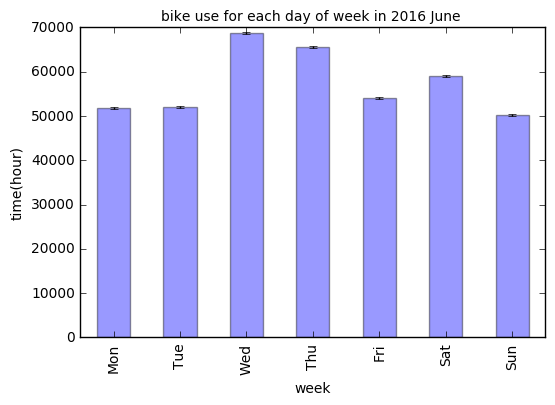

In [156]:
#plot unnormalized data
ax = triptime.plot(kind = 'bar', alpha = 0.4, yerr=[(error,error)])
ax.set_title("bike use for each day of week in 2016 June ", fontsize = 10)
ax.set_xlabel("week", fontsize = 10)
ax.set_ylabel("time(hour)", fontsize = 10)
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=10)
plt.show()

comment: this plot shows the tripduration for each day of the week, we can only see here that there is not much difference between weekdays and weekends

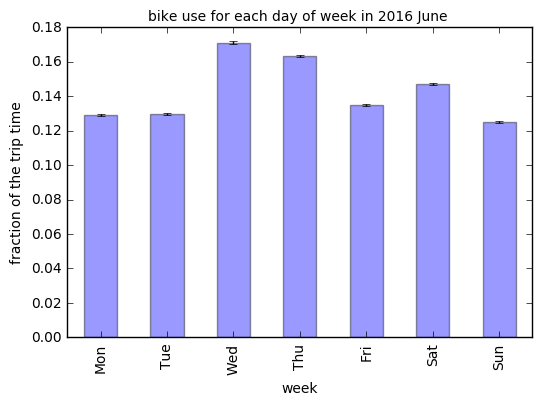

In [135]:
#normalized data
ax = (triptime/norm).plot(kind = 'bar', alpha = 0.4, yerr=[(error/norm,error/norm)])
ax.set_title("bike use for each day of week in 2016 June ", fontsize = 10)
ax.set_xlabel("week", fontsize = 10)
ax.set_ylabel("fraction of the trip time", fontsize = 10)
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=10)
plt.show()
plt.savefig('1.png')

comment: here I normalize the data to show the ratio that each day has

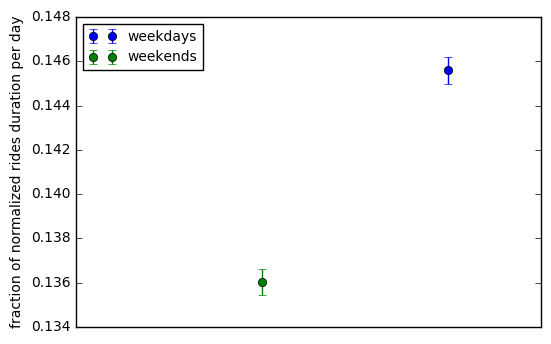

In [151]:
week_w = wday / norm
wend_w = wend / norm
eweek = np.sqrt(wday) / norm
eend = np.sqrt(wend) / norm
plt.errorbar([0.4], [week_w], yerr=[eweek], fmt='o', label='weekdays')
plt.errorbar([0.2], [wend_w], yerr=[eend], fmt='o', label='weekends')
plt.ylabel("fraction of normalized rides duration per day", fontsize = 10)
plt.xlim(0, 0.5)
plt.legend(fontsize = 10, loc = "upper left")
plt.xticks([])
plt.show()
plt.savefig('1.png')

comment: here I show the bike triptime difference for weekends and weekdays

In [178]:
dev = np.sqrt(week_w * (1 - week_w) / wend)

In [180]:
zscore = (week_w - wend_w) / dev

In [3]:
zscore

6.33415350614771

## Since the z-score equals to 6.33, the mean bike time on weekends is 6 sigma away from the weekdays, which gives p << 0.05, which means we can reject the null hypothesis